<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Установка-и-импорт-библиотек" data-toc-modified-id="Установка-и-импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Установка и импорт библиотек</a></span><ul class="toc-item"><li><span><a href="#Установка-библиотек" data-toc-modified-id="Установка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка библиотек</a></span></li><li><span><a href="#Импорт-библиотек-и-переменные" data-toc-modified-id="Импорт-библиотек-и-переменные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импорт библиотек и переменные</a></span></li></ul></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подготовка-данных-под-все-виды-моделей" data-toc-modified-id="Подготовка-данных-под-все-виды-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных под все виды моделей</a></span><ul class="toc-item"><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Создание-датафреймов-для-DeBERTa-и-TF-IDF" data-toc-modified-id="Создание-датафреймов-для-DeBERTa-и-TF-IDF-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание датафреймов для DeBERTa и TF-IDF</a></span></li><li><span><a href="#Подготовка-данных-под-transformers" data-toc-modified-id="Подготовка-данных-под-transformers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка данных под transformers</a></span></li><li><span><a href="#Подготовка-данных-под-TF-IDF" data-toc-modified-id="Подготовка-данных-под-TF-IDF-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подготовка данных под TF-IDF</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Transformers" data-toc-modified-id="Transformers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Transformers</a></span></li></ul></li><li><span><a href="#Определение-победителя" data-toc-modified-id="Определение-победителя-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Определение победителя</a></span><ul class="toc-item"><li><span><a href="#Сделаем-предсказание-на-тестовой-выборке" data-toc-modified-id="Сделаем-предсказание-на-тестовой-выборке-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Сделаем предсказание на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» c BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Установка и импорт библиотек

### Установка библиотек

In [1]:
!pip install -q catboost

In [2]:
!pip install -q torch

In [3]:
!pip install -q transformers

In [4]:
!pip install -q sentencepiece

In [5]:
!pip install -q spacy

### Импорт библиотек и переменные

In [6]:
import os
import pandas as pd
import numpy as np
import sentencepiece
import requests
import transformers
import torch
import nltk
import spacy
import re
import matplotlib.pyplot as plt

from tqdm import notebook
from transformers import BertTokenizer
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, ParameterGrid, StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
# from nltk.stem import WordNetLemmatizer 
# from nltk.tokenize import word_tokenize
# from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords


In [7]:
RANDOM_STATE = 12345
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

## Изучение данных

In [27]:
# Загрузим данные
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [28]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [31]:
data.drop('Unnamed: 0', axis=1, inplace= True)

In [32]:
'Unnamed: 0' in data.columns

False

In [33]:
# Удалим ненужный столбец вот таким большим кодом
# Стандартный код datа = data.drop('Unnamed: 0', axis=1) 
# почему-то работает через раз в локальном jupyter

if 'Unnamed: 0' in data.columns:
    del data['Unnamed: 0']

In [13]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


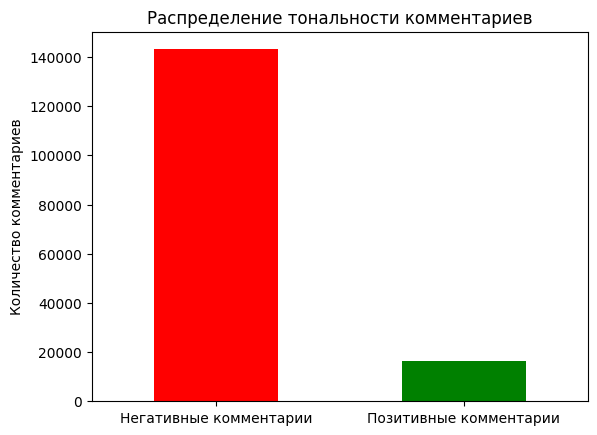

In [13]:
# Изучим распределение целевого признака
comment_counts = data['toxic'].value_counts()
comment_counts.plot.bar(color=['red','green'])
plt.title('Распределение тональности комментариев')
plt.ylabel('Количество комментариев')
plt.xticks([0,1],['Негативные комментарии','Позитивные комментарии'], rotation = 0)
plt.show()

Промежуточные выводы:
* Датасет загружен
* Изучены типы данных
* Определен дисбаланс классов

## Подготовка данных под все виды моделей

### Очистка текста

In [14]:
# Возьмем образцы текстов
print(repr(data['text'].iloc[0]))
print(repr(data['text'].iloc[3]))

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'


In [15]:
# Функция очистки текста от спецсимволов
def clear_texts(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'(\s)([iI][eE]|[eE][gG])(\s)', r' \2 ', text)
    text = " ".join(text.split())
    return text.lower()

In [16]:
# Проверим корректность работы функции очистки
texts = [
    "Explanation\nWhy https: the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
    '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'
]
clean_text = [clear_texts(text) for text in texts]
print(clean_text)

['explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport']


In [17]:
# Применим очистку к исходному датасету
data['clear_text'] = data['text'].apply(clear_texts)

In [18]:
data.head()

,text,toxic,clear_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


Промежуточные выводы:
* Очистили текст от спецсимовлов
* Преобразовали текст в нижний регистр

### Создание датафреймов для DeBERTa и TF-IDF

In [19]:
data_trans = data.copy()
data_tfidf = data.copy()

In [20]:
print(data_trans.head())
print(data_tfidf.head())

                                                text  toxic  \
0  Explanation\nWhy the edits made under my usern...      0   
1  D'aww! He matches this background colour I'm s...      0   
2  Hey man, I'm really not trying to edit war. It...      0   
3  "\nMore\nI can't make any real suggestions on ...      0   
4  You, sir, are my hero. Any chance you remember...      0   

                                          clear_text  
0  explanation why the edits made under my userna...  
1  d aww he matches this background colour i m se...  
2  hey man i m really not trying to edit war it s...  
3  more i can t make any real suggestions on impr...  
4  you sir are my hero any chance you remember wh...  
                                                text  toxic  \
0  Explanation\nWhy the edits made under my usern...      0   
1  D'aww! He matches this background colour I'm s...      0   
2  Hey man, I'm really not trying to edit war. It...      0   
3  "\nMore\nI can't make any real sugge

### Подготовка данных под transformers

In [21]:
# Создадим объект токенизатора BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [23]:
# Создаю подвыборку из 1000 строк с соотношением 90/10
sample_0 = data_trans[data_trans['toxic'] == 0].sample(1800, random_state=RANDOM_STATE)
sample_1 = data_trans[data_trans['toxic'] == 1].sample(200, random_state=RANDOM_STATE)

df_sample = pd.concat([sample_0, sample_1])

# Перемешиваю строки
df_sample = df_sample.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

In [24]:
df_sample

,text,toxic,clear_text
0,What the fuck are u talking about?,1,what the fuck are u talking about
1,"""\nPlease do not do this again, Ned. I deleted...",0,please do not do this again ned i deleted the ...
2,"""\n Thanks, but I have no regrets. Talk """,0,thanks but i have no regrets talk
3,S.A.C. and mass hysteria \n\nIt occurs to me t...,0,s a c and mass hysteria it occurs to me that s...
4,"""\n\nInheritance\nGod promised Aaron, the firs...",0,inheritance god promised aaron the first kohen...
...,...,...,...
1995,I dont see how this topic could meet notabilit...,0,i dont see how this topic could meet notabilit...
1996,"""\n\n Suppression of Falun Gong debate \n\nI'm...",0,suppression of falun gong debate i m not too a...
1997,", Luke. Please do not just slap pre-written w...",0,luke please do not just slap pre written warni...
1998,"""\nThe photograph you claim is copyrighted is ...",0,the photograph you claim is copyrighted is sou...


In [25]:
# Проверим соотношение
df_sample['toxic'].value_counts()

0    1800
1     200
Name: toxic, dtype: int64

In [26]:
max_length = tokenizer.model_max_length
tokenized_sample = df_sample['clear_text'].apply(lambda x: tokenizer.encode(x, 
                                                                            add_special_tokens=True, 
                                                                            max_length=max_length))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [27]:
max_len = 0
for i in tokenized_sample.values:
    if len(i) > max_len:
        max_len = len(i)

padded_sample = np.array([i + [0]*(max_len - len(i)) for i in tokenized_sample.values])
attention_mask_sample = np.where(padded_sample != 0, 1, 0)

In [28]:
# Проверяем размеры
print(padded_sample.shape)
print(attention_mask_sample.shape)

(2000, 512)
(2000, 512)


Промежуточные выводы:
* Создали укороченный сбалансированный датасет для deBERTа
* Токенизировали текст
* Добавили токены в padding
* Маскировали реальные токены

### Подготовка данных под TF-IDF

In [29]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

In [30]:
# Сделаем проверку функции лемматизации
sample_text = "The striped bats were hanging on their feet and ate best fishes"
lemmatized_text = lemmatize_text(sample_text)
print(lemmatized_text)

the stripe bat be hang on their foot and eat good fish


In [31]:
# Применим лемматизацию к очищенному тексту
data_tfidf['lemm_text'] = data_tfidf['clear_text'].apply(lemmatize_text)

In [32]:
data_tfidf.head()

,text,toxic,clear_text,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...,d aww he match this background colour I m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...,hey man I m really not try to edit war it s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...,more I can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,you sir be my hero any chance you remember wha...


In [33]:
# Загрузим стоп-слова
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /Users/andrew-
[nltk_data]     mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Стратифицируем train/val/test
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

X = data_tfidf['lemm_text']
y = data_tfidf['toxic']

for train_index, temp_index in strat.split(X, y):
    X_temp, y_temp = X.iloc[temp_index], y.iloc[temp_index]
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

strat_val_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for val_index, test_index in strat_val_test.split(X_temp, y_temp):
    X_val, y_val = X_temp.iloc[val_index], y_temp.iloc[val_index]
    X_test, y_test = X_temp.iloc[test_index], y_temp.iloc[test_index]

In [36]:
# Обучим TfidfVectorizer на train, трансформируем val и test
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train = vectorizer.fit_transform(X_train)

X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [38]:
print("Размер обучающего набора: ", X_train.shape)
print("Размер валидационного набора: ", X_val.shape)
print("Размер тестового набора: ", X_test.shape)
print("Размер (y_train): ", y_train.shape)
print("Размер (y_val): ", y_val.shape)
print("Размер (y_test): ", y_test.shape)

Размер обучающего набора:  (111504, 118085)
Размер валидационного набора:  (23894, 118085)
Размер тестового набора:  (23894, 118085)
Размер (y_train):  (111504,)
Размер (y_val):  (23894,)
Размер (y_test):  (23894,)


In [39]:
results_tab = pd.DataFrame(columns=['n/n', 'F1_score'])
results_tab

,n/n,F1_score


Промежуточные выводы:
* Лемматизировали комментарии
* Создали матрицу TF-IDF
* Стратифицировали и разделили выборки

## Обучение

### Logistic Regression

In [40]:
# Обучим модель
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [41]:
# Предскажем на valid
y_val_pred_lr = model_lr.predict(X_val)

# Рассчитаем F1
f1_lr = f1_score(y_val, y_val_pred_lr)
print('F1 score: ', f1_lr)
results_tab = results_tab.append(pd.Series(['LR', f1_lr], index=results_tab.columns), ignore_index=True)

F1 score:  0.7446731672083784


### CatBoost

In [42]:
#########################################################
# В результате подбора этих гиперпараметров выиграли те,
# которые указаны в действующем коде
# param_grid = {
#     'learning_rate': [0.2, 0.4, 0.6],
#     'depth': [5, 10, 15],
#     'l2_leaf_reg': [1, 3, 5],
#     'iterations': [200, 500, 1000],
#     'border_count': [32, 64, 128, 254],
#     'auto_class_weights': ['Balanced', 'SqrtBalanced']
# }
#########################################################

param_grid = {
    'loss_function': ['Logloss'],
    'learning_rate': [0.4],
    'iterations': [500],
    'auto_class_weights': ['Balanced']
}

best_f1_score = 0
best_params = None
best_model = None

In [43]:
# Переберем гиперпараметры и найдем лучшие
print(f"Идет поиск лучших гиперпараметров ...")
for params in ParameterGrid(param_grid):
     model_cbr = CatBoostClassifier(**params,
                                    random_state=RANDOM_STATE,
                                    verbose=50,
                                    thread_count=-1)
     model_cbr.fit(X_train, y_train)
     pred = model_cbr.predict(X_val)
     score = f1_score(y_val, pred, average='macro')
     if score > best_f1_score:
         best_f1_score = score
         best_params = params
         best_model = model_cbr

print(f"Лучшие гиперпараметры: {best_params}")

Идет поиск лучших гиперпараметров ...
0:	learn: 0.5764639	total: 1.91s	remaining: 15m 55s
50:	learn: 0.2892914	total: 1m 37s	remaining: 14m 18s
100:	learn: 0.2369557	total: 3m 6s	remaining: 12m 14s
150:	learn: 0.2093717	total: 4m 16s	remaining: 9m 52s
200:	learn: 0.1884151	total: 5m 15s	remaining: 7m 49s
250:	learn: 0.1735805	total: 6m 10s	remaining: 6m 7s
300:	learn: 0.1590924	total: 7m 5s	remaining: 4m 41s
350:	learn: 0.1465083	total: 8m	remaining: 3m 23s
400:	learn: 0.1367415	total: 8m 54s	remaining: 2m 12s
450:	learn: 0.1284692	total: 9m 49s	remaining: 1m 4s
499:	learn: 0.1206656	total: 10m 44s	remaining: 0us
Лучшие гиперпараметры: {'auto_class_weights': 'Balanced', 'iterations': 500, 'learning_rate': 0.4, 'loss_function': 'Logloss'}


In [44]:
# Обучим CatBoost на лучших гиперпараметрах
model_cbr = CatBoostClassifier(**best_params,
                               random_state=RANDOM_STATE,
                               verbose=0,
                               thread_count=-1)
model_cbr.fit(X_train, y_train)

In [45]:
# Предскажем на val
y_val_pred_cbr = model_cbr.predict(X_val)

# Рассчитаем F1
f1_cbr = f1_score(y_val, y_val_pred_cbr)
print('F1 score: ', f1_cbr)
results_tab = results_tab.append(pd.Series(['CatBoost', f1_cbr], 
                                           index=results_tab.columns), ignore_index=True)

F1 score:  0.7659168890583302


### Transformers

In [46]:
model_bert = transformers.BertModel.from_pretrained('bert-base-uncased')

In [47]:
batch_size = min(400, padded_sample.shape[0] // 2)

embeddings_sample = []
for i in notebook.tqdm(range(padded_sample.shape[0] // batch_size)):
    batch = torch.LongTensor(padded_sample[batch_size*i:batch_size*(i+1)]) 
    attention_mask_batch = torch.LongTensor(attention_mask_sample[batch_size*i:batch_size*(i+1)])

    with torch.no_grad():
        batch_embeddings = model_bert(batch, attention_mask=attention_mask_batch)
        
    embeddings_sample.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/5 [00:00<?, ?it/s]

In [48]:
features_sample = np.concatenate(embeddings_sample)

In [49]:
# Создаю train/val/test 70/15/15
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    features_sample,
    df_sample['toxic'].values,
    test_size=0.3, 
    random_state=RANDOM_STATE)

X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(
    X_test_b,
    y_test_b,
    test_size=0.5,
    random_state=RANDOM_STATE)

In [50]:
lr_model_b = LogisticRegression(max_iter=1000)
lr_model_b.fit(X_train_b, y_train_b)

LogisticRegression(max_iter=1000)

In [51]:
pred_b = lr_model_b.predict(X_val_b)
f1_b = f1_score(y_val_b, pred_b)
print('F1 score: ', f1_b)
results_tab = results_tab.append(pd.Series(['Transformers', f1_b], index=results_tab.columns), ignore_index=True)

F1 score:  0.6181818181818182


Промежуточные выводы:
* Обучили модели CatBoost, BERT и Logistic Regression, проверили их на валидационных данных - лучший результат catboost

## Определение победителя

In [52]:
results_tab

,n/n,F1_score
0,LR,0.744673
1,CatBoost,0.765917
2,Transformers,0.618182


### Сделаем предсказание на тестовой выборке

In [53]:
final_pred = model_cbr.predict(X_test)
f1 = f1_score(y_test, final_pred)
print('F1 score: ', f1)

F1 score:  0.7707730865625602


## Выводы

Исходя из цели достичь F1-оценки выше 0.75, мы получили следующие данные:
* Логистическая регрессия на валидационных данных 0.744
* CatBoost на валидационных данных 0.765
* BERT демонстрирует наименьшую F1-оценку 0.618 на валидационных данных.

Так как CatBoost получил наивысшую оценку, то мы произвели предсказание на тестовой выборке и получили F1-меру равную 0.77, что полностью удовлетворяет условие задачи.

В целом модель CatBoost показала хороший результат и способна эффективно определять тональность текста.